# Juntando R y Python

In [73]:
import pandas as pd
import numpy as np

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri

In [76]:
rpy2.robjects.numpy2ri.activate()

In [77]:
codigo_r = """
saludar <- function(cadena){
    return(paste("Hola, ", cadena))
}
"""

In [78]:
ro.r(codigo_r)

R object with classes: ('function',) mapped to:

In [79]:
saludar_py = ro.globalenv["saludar"] #llamamos a la funcion creada en R llamada saludar

In [80]:
res = saludar_py("Antonio Banderas")
res[0]

'Hola,  Antonio Banderas'

In [81]:
type(res)

rpy2.robjects.vectors.StrVector

In [82]:
print(saludar_py.r_repr()) #para acceder al código de R

function (cadena) 
{
    return(paste("Hola, ", cadena))
}


In [83]:
var_from_python = ro.FloatVector(np.arange(1,5,0.1))

In [84]:
var_from_python

1.000000,1.100000,1.200000,...,4.700000,4.800000,4.900000


In [85]:
print(var_from_python.r_repr()) #representacion en R c(...)

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


In [86]:
ro.globalenv["var_to_r"] = var_from_python #añade en R una variable var_to_r a partir de la var_from_python

In [87]:
ro.r("var_to_r") #accedemos a la variable de R

1.000000,1.100000,1.200000,...,4.700000,4.800000,4.900000


In [88]:
ro.r("sum(var_to_r)")

118.000000


In [89]:
ro.r("mean(var_to_r)")

2.950000


In [90]:
ro.r("sd(var_to_r)")

1.169045


In [91]:
np.sum(var_from_python)

118.00000000000007

In [92]:
np.mean(var_from_python)

2.950000000000002

In [93]:
ro.r("summary(var_to_r)")

1.000000,1.975000,2.950000,2.950000,3.925000,4.900000


In [94]:
ro.r("hist(var_to_r, breaks = 4)")

breaks,[RTYPES.INTSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


# Trabajar de forma conjunta entre R y Python

In [95]:
from rpy2.robjects.packages import importr

In [96]:
ro.r("install.packages('extRemes')")# si os falla decidle 'n' al hacer la instalación

R[write to console]: Installing package into ‘/home/david/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/extRemes_2.0-10.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 354587 bytes (346 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

<rpy2.rinterface.NULLType object at 0x7fd8f301de88> [RTYPES.NILSXP]

In [66]:
extremes = importr("extRemes") # library(extRemes)

In [67]:
fevd = extremes.fevd #usamos un metodo de la estimación máxima verosimil(fevd) como prueba de uso de paquetes de R

In [68]:
print(fevd.__doc__) #consutlamos la documentación de fevd

Python representation of an R function.
description
-----------


 Fit a univariate extreme value distribution functions (e.g., GEV, GP, PP, Gumbel, or Exponential) to data; possibly with covariates in the parameters.
 


fevd(
    x,
    data,
    threshold = rinterface.NULL,
    threshold_fun = ~,
    location_fun = ~,
    scale_fun = ~,
    shape_fun = ~,
    use_phi = False,
    type = c,
    method = c,
    initial = rinterface.NULL,
    span,
    units = rinterface.NULL,
    time_units = days,
    period_basis = year,
    na_action = <rpy2.rinterface.ListSexpVector object at 0x7fd8e3c8bcc8> [RTYPES.VECSXP],
    optim_args = rinterface.NULL,
    priorFun = rinterface.NULL,
    priorParams = rinterface.NULL,
    proposalFun = rinterface.NULL,
    proposalParams = rinterface.NULL,
    iter = 9999.0,
    weights = 1.0,
    blocks = rinterface.NULL,
    verbose = False,
)

x :  `fevd`: `x` can be a numeric vector, the name of a column of `data` or a formula giving the data to which th

In [97]:
data = pd.read_csv("../datasets/time/time_series.txt", 
                   sep = "\s+", skiprows = 1, parse_dates = [[0,1]], #con parse_dates agrupamos la columna 0 y la 1(fecha y hora)
                   names = ["date", "time", "wind_speed"],
                   index_col = 0)

In [98]:
data.head(5)

,wind_speed
date_time,
1983-01-01 00:00:00,7.9
1983-01-01 01:00:00,8.2
1983-01-01 02:00:00,8.5
1983-01-01 03:00:00,9.0
1983-01-01 04:00:00,9.9


In [71]:
data.shape

(275352, 1)

In [106]:
max_ws = data.wind_speed.groupby(pd.TimeGrouper(freq="A")).max() #Lo agrupamos por año ynos quedamos con el máximo valor de 'A' de año

AttributeError: module 'pandas' has no attribute 'TimeGrouper'

In [37]:
max_ws

date_time
1983-12-31    22.2
1984-12-31    25.5
1985-12-31    21.5
1986-12-31    22.5
1987-12-31    23.7
1988-12-31    22.5
1989-12-31    21.7
1990-12-31    29.7
1991-12-31    24.2
1992-12-31    23.8
1993-12-31    28.1
1994-12-31    23.4
1995-12-31    23.7
1996-12-31    25.6
1997-12-31    23.2
1998-12-31    24.9
1999-12-31    22.8
2000-12-31    24.6
2001-12-31    22.3
2002-12-31    25.5
2003-12-31    22.6
2004-12-31    24.0
2005-12-31    20.8
2006-12-31    23.5
2007-12-31    24.4
2008-12-31    24.1
2009-12-31    25.1
2010-12-31    19.4
2011-12-31    22.8
2012-12-31    24.2
2013-12-31    25.0
2014-12-31    25.3
Freq: A-DEC, Name: wind_speed, dtype: float64

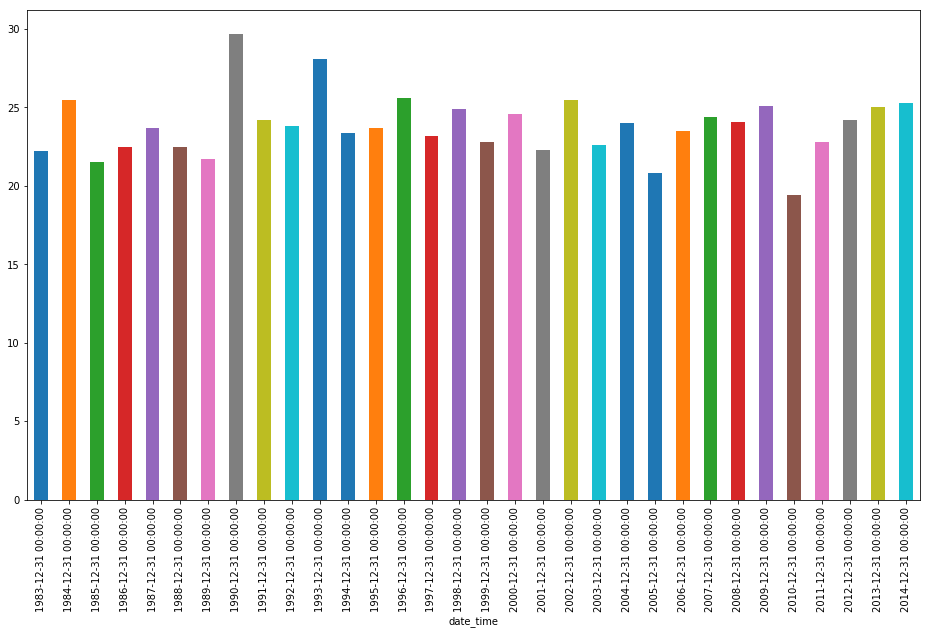

In [38]:
max_ws.plot(kind="bar", figsize=(16,9))

In [39]:
result = fevd(max_ws.values, type="GEV", method = "GMLE")

In [40]:
print(type(result))

<class 'rpy2.robjects.vectors.ListVector'>


In [41]:
result.r_repr

<bound method RObjectMixin.r_repr of R object with classes: ('fevd',) mapped to:
<ListVector - Python:0x115c53308 / R:0x7f90fe4f48d0>
[Vector, StrVector, FloatVector, BoolVector, ..., StrVector, StrVector, ListVector, ListVector]
  call: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('fevd',) mapped to:
<Vector - Python:0x11141ab88 / R:0x7f90fdf4bce8>
[SignatureT..., Array, StrVector, StrVector]
  data.name: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x11141a7c8 / R:0x7f910162d340>
['struct..., '23.8, ..., '22.6, ..., '25.3),..., '']
  weights: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x11141af48 / R:0x7f910260beb8>
[1.000000]
  in.data: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x11141af08 / R:0x7f9102164fb8>
[       0]
...
  priorFun: <class 'rpy2.robject

In [43]:
print(result.names)

 [1] "call"            "data.name"       "weights"         "in.data"        
 [5] "x"               "priorFun"        "priorParams"     "method"         
 [9] "type"            "period.basis"    "par.models"      "const.loc"      
[13] "const.scale"     "const.shape"     "n"               "na.action"      
[17] "parnames"        "results"         "initial.results"



In [44]:
res = result.rx("results")

In [58]:
print(res[0])

$par
  location      scale      shape 
23.0639415  1.7576913 -0.1628816 

$value
[1] 1e+16

$counts
function gradient 
       1        1 

$convergence
[1] 0

$message
NULL

$hessian
         location scale shape
location        0     0     0
scale           0     0     0
shape           0     0     0

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
[1] 1





In [62]:
loc, scale, shape = res[0].rx("par")[0]

In [63]:
loc

23.06394151991562

In [64]:
scale

1.7576912874286912

In [65]:
shape

-0.1628816367715244

# Función mágica para R

In [107]:
%load_ext rpy2.ipython

In [108]:
help(rpy2.ipython.rmagic.RMagics.R)

Help on function R in module rpy2.ipython.rmagic:

R(self, line, cell=None, local_ns=None)
    ::
    
      %R [-i INPUT] [-o OUTPUT] [-n] [-w WIDTH] [-h HEIGHT] [-p POINTSIZE]
             [-b BG] [--noisolation] [-u {px,in,cm,mm}] [-r RES]
             [--type {cairo,cairo-png,Xlib,quartz}] [-c CONVERTER]
             [code [code ...]]
    
    Execute code in R, optionally returning results to the Python runtime.
    
    In line mode, this will evaluate an expression and convert the returned
    value to a Python object.  The return value is determined by rpy2's
    behaviour of returning the result of evaluating the final expression.
    
    Multiple R expressions can be executed by joining them with
    semicolons::
    
        In [9]: %R X=c(1,4,5,7); sd(X); mean(X)
        Out[9]: array([ 4.25])
    
    In cell mode, this will run a block of R code. The resulting value
    is printed if it would be printed when evaluating the same code
    within a standard R REPL.
    
   

In [109]:
%R X=c(1,4,5,7); sd(X); mean(X)

array([4.25])

In [110]:
%%R
Y = c(2,4,3,9)
lm = lm(Y~X)
summary(lm)


Call:
lm(formula = Y ~ X)

Residuals:
    1     2     3     4 
 0.88 -0.24 -2.28  1.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.0800     2.3000   0.035    0.975
X             1.0400     0.4822   2.157    0.164

Residual standard error: 2.088 on 2 degrees of freedom
Multiple R-squared:  0.6993,	Adjusted R-squared:  0.549 
F-statistic: 4.651 on 1 and 2 DF,  p-value: 0.1638



In [118]:
%R -i result plot.fevd(result)

NameError: name 'result' is not defined

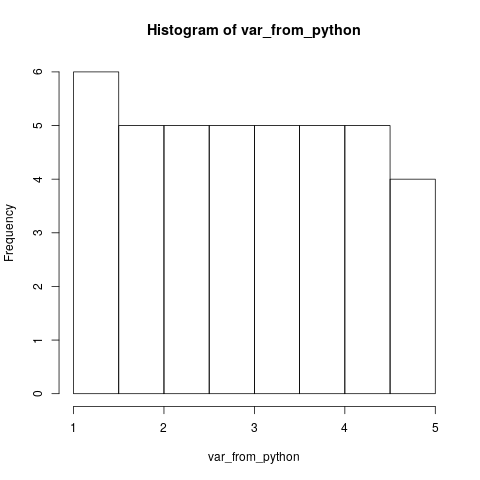

breaks,[RTYPES.REALSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


In [112]:
%R -i var_from_python hist(var_from_python)

In [116]:
ro.globalenv["result"] = result
ro.r("plot.fevd(result)") ## puede dar error y generar un objeto rpy2.rinterface.NULL

NameError: name 'result' is not defined

# Un ejemplo complejo de R, Python y Rmagic

In [114]:
metodos = ["MLE", "GMLE", "Bayesian", "Lmoments"]
tipos = ["GEV", "Gumbel"]

In [115]:
for t in tipos:
    for m in metodos:
        print("Tipo de Ajuste: ", t)
        print("Método del Ajuste: ", m)
        result = fevd(max_ws.values, method = m, type = t)
        print(result.rx("results")[0])
        %R -i result plot.fevd(result)

Tipo de Ajuste:  GEV
Método del Ajuste:  MLE


NameError: name 'max_ws' is not defined